In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

wm_yr_wk             23378.111297
wday                     4.004633
month                   11.834190
year                     2.425418
event_name_1             0.074814
event_type_1             0.074814
event_name_2             0.002058
event_type_2             0.002058
cpi                     21.614138
unemployment_rate        1.962759
gas_price                0.339318
snap_tx                  0.221121
tx_walmart             107.574527
tx_hobbies              75.900993
tx_household           109.666402
tx_foods                61.810252
median_price             0.006359
min_price                0.003133
max_price                4.265244
dtype: float64
(1909, 19)
(1909, 9)
[ True  True False  True False False False False  True  True  True False
 False False  True False  True False  True]
0.5017637404712828
r2: 0.5017637404712828
MAE: 281.1218496358274
MSE: 127166.5293652731
RMSE: 356.60416341550626


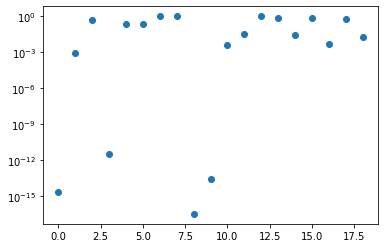

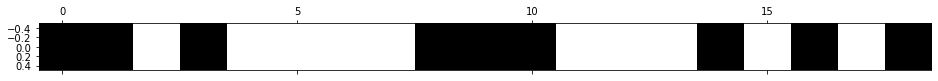

In [26]:
data = pd.read_csv("TX_3_sales_data.csv")
data.drop
data.head()
data.shape

data = data.dropna()

data1 = data.iloc[:,1:17]
# data1.head()

y = data['store_sales']

data2 = data.iloc[:,18:]
# data2.head()

X_new = pd.concat([data1, data2], axis=1, join='inner')
# X_new.head()

X_new.event_type_2 = X_new.event_type_2.replace({'None':0,'Cultural':1, 'Religious':1})
X_new.event_name_2 = X_new.event_name_2.replace({"None":0,"Easter":1, "Cinco De Mayo":1, "OrthodoxEaster":1, "Father's day":1})
# X_new.event_type_1 = X_new.event_type_1.replace({'None':0,'Sporting':1, 'Cultural':1, 'National':1 'Religious':1})
X_new.event_name_1 = X_new.event_name_1.replace({'None':0, 'SuperBowl':1, 'ValentinesDay':1, 'PresidentsDay':1, 'LentStart':1,
 'LentWeek2':1, 'StPatricksDay':1, 'Purim End':1, 'OrthodoxEaster':1, 'Pesach End':1,
 'Cinco De Mayo':1, "Mother's day":1, 'MemorialDay':1, 'NBAFinalsStart':1,
 'NBAFinalsEnd':1, "Father's day":1, 'IndependenceDay':1, 'Ramadan starts':1,
 'Eid al-Fitr':1, 'LaborDay':1, 'ColumbusDay':1, 'Halloween':1, 'EidAlAdha':1,
 'VeteransDay':1, 'Thanksgiving':1, 'Christmas':1, 'Chanukah End':1, 'NewYear':1,
 'OrthodoxChristmas':1, 'MartinLutherKingDay':1, 'Easter':1}).astype(np.uint8)


X_new.event_type_1 = X_new.event_type_1.replace({'None':0, 'Sporting':1, 'Cultural':1, 'National':1, 'Religious':1})

x_train = X_new[:-32]
x_test = X_new[-32:]
y_test = y[-32:]
y_train = y[:-32]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns


LR=LinearRegression(normalize=True)
LR.fit(x_train,y_train)

from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(X_new, y)
# lin_reg.intercept_, lin_reg.coef_

from sklearn.feature_selection import f_classif, f_regression, chi2
import matplotlib.pyplot as plt
F, p = f_classif(x_train, y_train)
plt.figure()
plt.semilogy(p, 'o')

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X_new)
print(X_new.var())

from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
select = SelectPercentile(percentile=50)
select.fit(x_train, y_train)
# transform training set:
x_train_selected = select.transform(x_train)

print(x_train.shape)
print(x_train_selected.shape)

mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

scaler=MinMaxScaler()
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps = [
            ('imputer', SimpleImputer()),
            ('scaler', scaler),
            ('LR',LinearRegression(normalize=True))
        ])
pipeline.fit(x_train, y_train)

y_train_pred = pipeline.predict(x_train)
y_pred = pipeline.predict(x_test)
score_train = r2_score(y_train, y_train_pred)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)
# score = r2_score(y_test, y_pred)
# print(f'Train score: {score_train.round(2)}')
# print(f'Test score: {score.round(2)}\n')

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2:',r2)
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
